# Part Two : Manufacturing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_in=pd.read_excel("Part2 - Company.xlsx")

In [3]:
data_in.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [4]:
data_in.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


In [5]:
data_in.describe().T

,count,mean,std,min,25%,50%,75%,max
A,61.0,118.557377,61.771494,3.0,61.0,136.0,171.0,200.0
B,61.0,116.639344,57.897908,5.0,63.0,138.0,168.0,200.0
C,61.0,114.081967,65.615368,3.0,59.0,135.0,174.0,200.0
D,61.0,114.459016,63.144431,3.0,51.0,132.0,174.0,199.0


# Interesting Insight into Data
1. Mean Quantity (I have not idea of the units here, lets say the units are moles), for a lot of the ingredients looks so close to each other. So, even tiny variations within it are going to be detrimental in determinig the Quality of the Wine.
2. Maximum number of moles for any single ingredient seem to be cut off at 200.0. Minimum Quantity of moles for any single ingredient is cut off at 3.0. That means we need to do some testing and tweaking the data with the values to find out what kind of quantities. 
3. If the values are so close and relative, that means the relative differences make much more of a difference than the actual value itself.

Experimenting a little here

There are 18 Missing values in the dataset regarding the Quality. So, we need to impute these values from the original data set where the values are already given. For that we need to filter out these entries and proceed further.

In [6]:
#Directly declaring columns here since they are few

columns_given=["A","B","C","D"]
temp_min=pd.DataFrame()

for col in columns_given:
    print("For Ingredeint :",col)
    print("\nMinimum Value Entry")
    print(data_in[data_in[col]==data_in[col].min()]) # Min value of the Same Quantity
    print("\nMaximum Value Entry")
    print(data_in[data_in[col]==data_in[col].max()]) # Max value of the same Quantity
    print("\n")

For Ingredeint : A

Minimum Value Entry
    A   B    C   D    Quality
22  3  63  109  67  Quality A

Maximum Value Entry
      A    B    C    D    Quality
56  200  186  185  179  Quality B


For Ingredeint : B

Minimum Value Entry
      A  B   C   D    Quality
39  102  5  59  72  Quality A

Maximum Value Entry
      A    B    C    D    Quality
11  138  200  153  192  Quality B


For Ingredeint : C

Minimum Value Entry
    A   B  C   D    Quality
3  61  23  3  44  Quality A

Maximum Value Entry
      A    B    C    D    Quality
43  169  184  200  133  Quality B


For Ingredeint : D

Minimum Value Entry
      A   B   C  D    Quality
51  110  33  76  3  Quality A

Maximum Value Entry
      A    B    C    D Quality
5   153  140  154  199     NaN
57  137  182  165  199     NaN




Here it looks like the Quality changes dramatically by the extreme values, especially with the extremum values on the right side, i.e. the maximum no of moles. So, let us now check for the special Qualities for those things that share that particular Quantity.

In [7]:
data_quality_A=data_in[data_in["Quality"]=="Quality A"]
data_quality_B=data_in[data_in["Quality"]=="Quality B"]

In [8]:
data_quality_A.describe()

,A,B,C,D
count,26.000000,26.000000,26.000000,26.000000
mean,58.769231,62.230769,53.000000,51.807692
std,33.391385,33.733435,33.224088,31.284526
min,3.000000,5.000000,3.000000,3.000000
25%,36.500000,29.250000,19.000000,31.250000
50%,53.500000,62.000000,58.000000,46.500000
75%,89.500000,93.250000,75.750000,71.000000
max,110.000000,109.000000,109.000000,110.000000


In [9]:
data_quality_B.describe()

,A,B,C,D
count,17.000000,17.000000,17.000000,17.000000
mean,167.176471,168.470588,173.470588,165.411765
std,23.862196,19.310352,18.868352,20.904721
min,132.000000,133.000000,134.000000,132.000000
25%,142.000000,157.000000,164.000000,150.000000
50%,170.000000,168.000000,176.000000,168.000000
75%,185.000000,181.000000,189.000000,179.000000
max,200.000000,200.000000,200.000000,198.000000


Here is the crux of the data now to see. With the comparison between these two data frames it becomes crystal clear that the maximum number of moles allowed for any particular ingredient is always the indicator how good the quality of the wine is going to be. Hence, we can clearly see here that there are two clusters of the data differentiated like oil and water. So, our model is going to develop two clusters of data with a mean value of around 55 or so for Quality A and around 178 for Quality B.

Based on this, we clearly fill in the missing values for the data with appropriate Quality based on their mean values given in other columns.

**Interesting Observation** : There is atleast 10 moles gap between the maximum permissible number of moles of any ingredient for Quality A wine, and the minimum number of moles for any ingredient observed in Quality B of Wine.
This might indicate that the values are not continuous, essentially stating that (Assuming that Quality A is good quality wine and A,B,C,D indicate the impurity concentrations for any given sample of wine), the possible Wine produced by one particular area (or one particular group of vineyards) seem to have higher concentrations of these impurities. That indicates more study is needed in regards to the generalized methods, pratices and extenral influences (including geography, climate or some other factors unknown) might be causing this dramatic change. The change is consistent indicating the most likely scenario as stated earlier. It is also added by the fact that standard deviations across the ingredients stay consistent and also much lower than that of higher quality wine. That probably points more towards the geographical or other external factors or practices more than human influence. Perhaps the types/breeds of fruit used for the plantation might be different. But most likely bet has to be on the idea that soil type and water supply, might be the culprit, as if often the case with a lot of scenarios like this.

Let us now delve into the K-Means Algorithm and see what its going to predict regarding the clustering of these data points, given their distribtuion.
Let us first start with separation of the data with missing (NaN) from the original dataset and working only on the data set for which complete information is available.

In [10]:
#Separated dataframe that is used for imputing the value.
data_in_process=data_in[data_in["Quality"].isna()==False]
other_data=data_in[data_in["Quality"].isna()==True]
#data_in_process

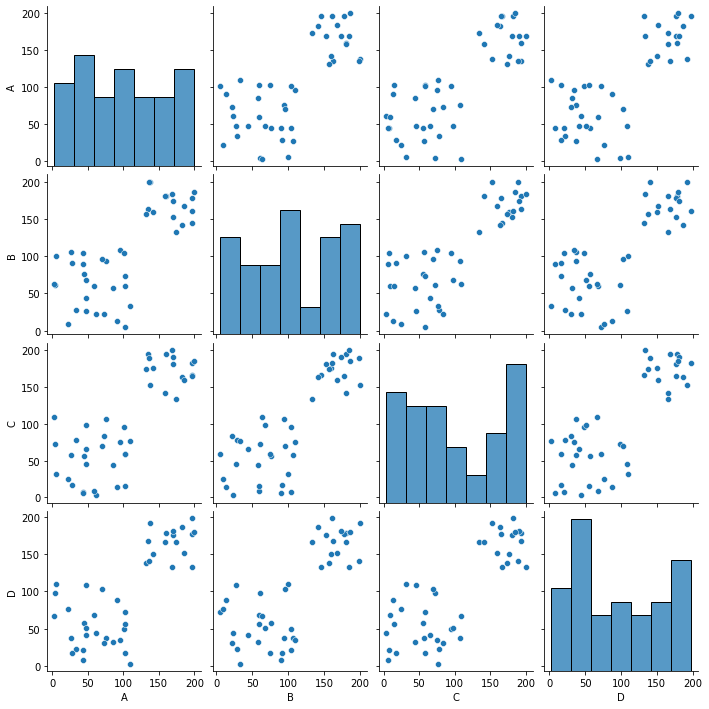

In [11]:
sns.pairplot(data_in_process)

**Idea for Imputation :** 

Step 1:
We first classify the data into appropriate classes checking the above plots, it is clear that there can be clear clusters available for forming.

Step 2:
We then split the data into test and train data and decide further actions.

Step 3:
If we are satisfied with labelling predictions we can use the machine learnt model to predict the entry for the missing data and consider them imputations.

Step 4:
If all goes well, we can choose to fit those predictions and inplace into our original dataframe and save it as a copy.

But before all that we should do some preliminary analysis of the data.


<AxesSubplot:>

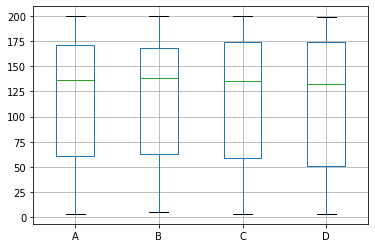

In [12]:
data_in.boxplot() #checking outliers for Original dataframe

<AxesSubplot:>

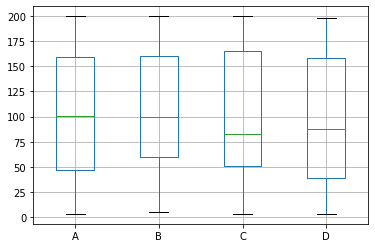

In [13]:
data_in_process.boxplot() #Checking outliers in the New dataframe

Looks like there are no outliers in any of the outlier columns. So, lets march ahead with the given data and create a test train split of the data.


<AxesSubplot:>

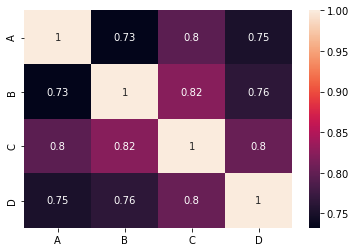

In [14]:
data_in_corr=data_in_process.corr()
sns.heatmap(data_in_corr,annot=True)

Looks like good correlation is there between A & C and B & D. That means they grow or decay together. Let us check now if they share any common characteristics towards prediction.

In [15]:
#Importing necessary libraries ony when it is required.

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans


x=data_in_process.drop("Quality",axis=1) # The rest four columns create our independent columns
y=data_in_process["Quality"] # This is out target variable because it needs prediction

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
## Please Note : Here we are using just two clusters because there aren't too many columns in the data
## and also the fact that it is clearly evident from the initial pair plots that there aren't more than two clusters visible anywhere.
## We can always check it otherwise, but is a waste of computation time for less than 100 entries and just 4 features.

kmeans_model = KMeans(n_clusters=2, n_init = 4, random_state=12345)

kmeans_model.fit(x_train,y_train)

predict_kmeans = kmeans_model.predict(x_test)
#confusion_kmeans=confusion_matrix(y_test, predict_kmeans, labels=["Quality A", "Quality B"])


#Accuracy_kmeans = accuracy_score(y_test, predict_kmeans)
#Recall_kmeans = recall_score(y_test, predict_kmeans)

#kmeans_model_Testscore=kmeans_model.score(x_test,y_test)
#kmeans_model_Trainscore=kmeans_model.score(x_train,y_train)
#print("The Data points here are :",x_test)
#print("Original points as they are present are :", y_test)
#print(predict_kmeans)

In [17]:
Dataframe_check=pd.DataFrame(x_test)
Dataframe_check["Y-Test"]=y_test
Dataframe_check["Y-Predicted"]=predict_kmeans
Dataframe_check["Y-Predicted"].replace({1:"Quality A",0:"Quality B"},inplace=True)

In [18]:
#Having a look at the Model's prediction vs Original data. Since data is so much less in number we are going for no other data
# analysis techniques like recall_score or accuracy_score.
Dataframe_check

,A,B,C,D,Y-Test,Y-Predicted
4,59,60,9,68,Quality A,Quality A
3,61,23,3,44,Quality A,Quality A
34,183,142,164,186,Quality B,Quality B
54,70,96,70,103,Quality A,Quality A
24,101,104,95,49,Quality A,Quality A
42,48,68,98,51,Quality A,Quality A
31,142,159,176,150,Quality B,Quality B
49,136,199,189,141,Quality B,Quality B
44,22,9,25,76,Quality A,Quality A
26,170,153,181,176,Quality B,Quality B


In [19]:
# Clean data predicting the missing values for Quality based on learned Algorithm
replacement=kmeans_model.predict(other_data[x.columns])
other_data["Quality"]=replacement
other_data.replace({1:"Quality A",0:"Quality B"},inplace=True)

<ipython-input-19-9ba1fd06b6f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data["Quality"]=replacement
C:\Users\Sheshank_Joshi\anaconda3\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
#Merging the dataframes for a clean and clear output
fresh_data_filled=pd.concat([data_in_process,other_data])

Making out that the predicted classifier model with labels assigned and the actual labels match perfectly. Hence, our no of clusters are also matching perfectly. We can perhaps tweak a little for the test_train split ratio a little and see how the data is going to be predicted.

But we are going to go ahead here to develop a function that would use this model we just trained to replace the missing values in our dataframe with the values predicted by classifier.

In [21]:
print("Here is our complete filled dataframe :")
fresh_data_filled

Here is our complete filled dataframe :


,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
6,34,28,78,22,Quality A
...,...,...,...,...,...
52,188,178,175,162,Quality B
57,137,182,165,199,Quality B
58,88,39,9,102,Quality A
59,180,157,192,198,Quality B


In [22]:
fresh_data_filled.count()

A          61
B          61
C          61
D          61
Quality    61
dtype: int64

In [23]:
# Checking for any Null Values
fresh_data_filled.isna().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

In [24]:
#Note : Here we can export the data back to replace in the same name of the data or as a copy.